<a href="https://colab.research.google.com/github/VikrantVDeo/Vibration-Analysis/blob/main/Room_Vibration_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
room_files = {
    "Room113": "Room113_MergedVibrationData.csv",
    "Room167": "Room167_MergedVibrationData.csv",
    "Room173": "Room173_MergedVibrationData.csv",
    "Room175": "Room175_MergedVibrationData.csv",
    "Room180": "Room180_MergedVibrationData.csv",
    "Room183": "Room183_MergedVibrationData.csv"
}

room_means = {}


In [26]:
for room, file_path in room_files.items():
    df = pd.read_csv(f"/content/{file_path}")
    if "Hz" in df.columns:
        df = df.drop(columns=["Hz"])
    room_means[room] = df.mean().mean()  # average

mean_df = pd.DataFrame(list(room_means.items()), columns=["Room", "Mean Vibration (in/s)"])
mean_df.sort_values("Room", inplace=True)


In [27]:
mean_df

,Room,Mean Vibration (in/s)
0,Room113,3.751549e-08
1,Room167,4.001690e-08
2,Room173,3.087159e-08
3,Room175,3.618913e-08
4,Room180,1.706085e-08
5,Room183,1.574871e-08


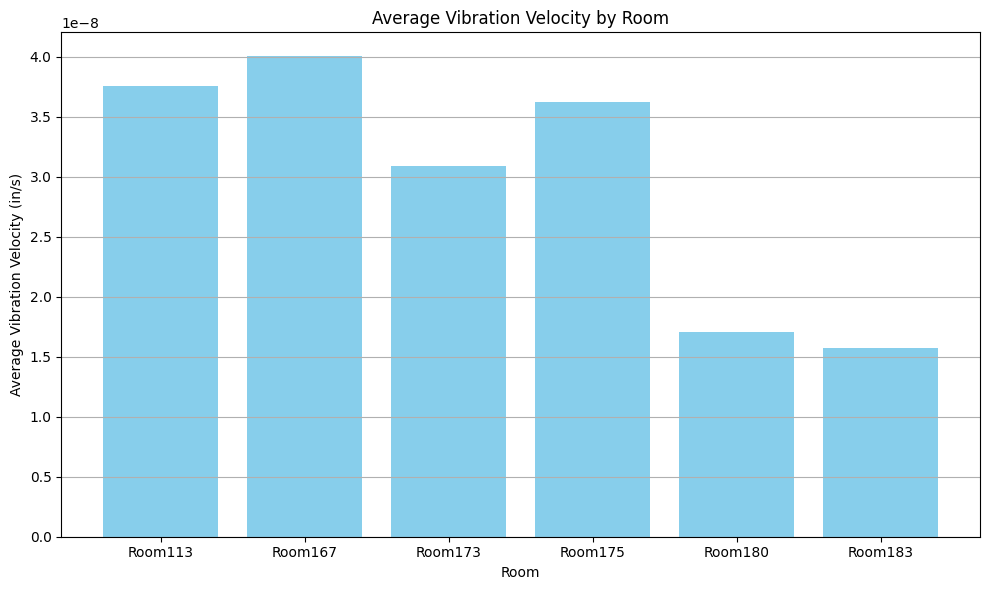

      Room  Mean Vibration (in/s)
0  Room113           3.751549e-08
1  Room167           4.001690e-08
2  Room173           3.087159e-08
3  Room175           3.618913e-08
4  Room180           1.706085e-08
5  Room183           1.574871e-08


In [28]:
# bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_df["Room"], mean_df["Mean Vibration (in/s)"], color='skyblue')
plt.xlabel("Room")
plt.ylabel("Average Vibration Velocity (in/s)")
plt.title("Average Vibration Velocity by Room")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(mean_df)

In [29]:
# Log-Log Spectra Comparison by Room (Average at Each Frequency)

room_avg_spectra = {}

for room, file_name in room_files.items():
    df = pd.read_csv(file_name)

    if "Hz" not in df.columns:
        continue

    freq = df["Hz"]
    avg_vib = df.drop(columns=["Hz"]).mean(axis=1)
    room_avg_spectra[room] = (freq, avg_vib)




In [30]:
avg_vib

,0
0,0.000000e+00
1,1.064009e-05
2,4.622854e-07
3,2.352614e-07
4,1.612969e-07
...,...
796,7.911321e-11
797,8.218221e-11
798,7.741638e-11
799,7.017119e-11


In [31]:
room_avg_spectra

{'Room113': (0        0.0
  1        0.5
  2        1.0
  3        1.5
  4        2.0
         ...  
  796    398.0
  797    398.5
  798    399.0
  799    399.5
  800    400.0
  Name: Hz, Length: 801, dtype: float64,
  0      0.000000e+00
  1      2.808748e-05
  2      4.723912e-07
  3      2.360370e-07
  4      1.455895e-07
             ...     
  796    7.252075e-11
  797    7.393976e-11
  798    7.946729e-11
  799    8.167175e-11
  800    8.079158e-11
  Length: 801, dtype: float64),
 'Room167': (0        0.0
  1        0.5
  2        1.0
  3        1.5
  4        2.0
         ...  
  796    398.0
  797    398.5
  798    399.0
  799    399.5
  800    400.0
  Name: Hz, Length: 801, dtype: float64,
  0      0.000000e+00
  1      3.006582e-05
  2      4.726703e-07
  3      2.314136e-07
  4      1.611076e-07
             ...     
  796    8.057832e-11
  797    7.977629e-11
  798    7.798844e-11
  799    7.673866e-11
  800    7.924074e-11
  Length: 801, dtype: float64),
 'Room173': (0    

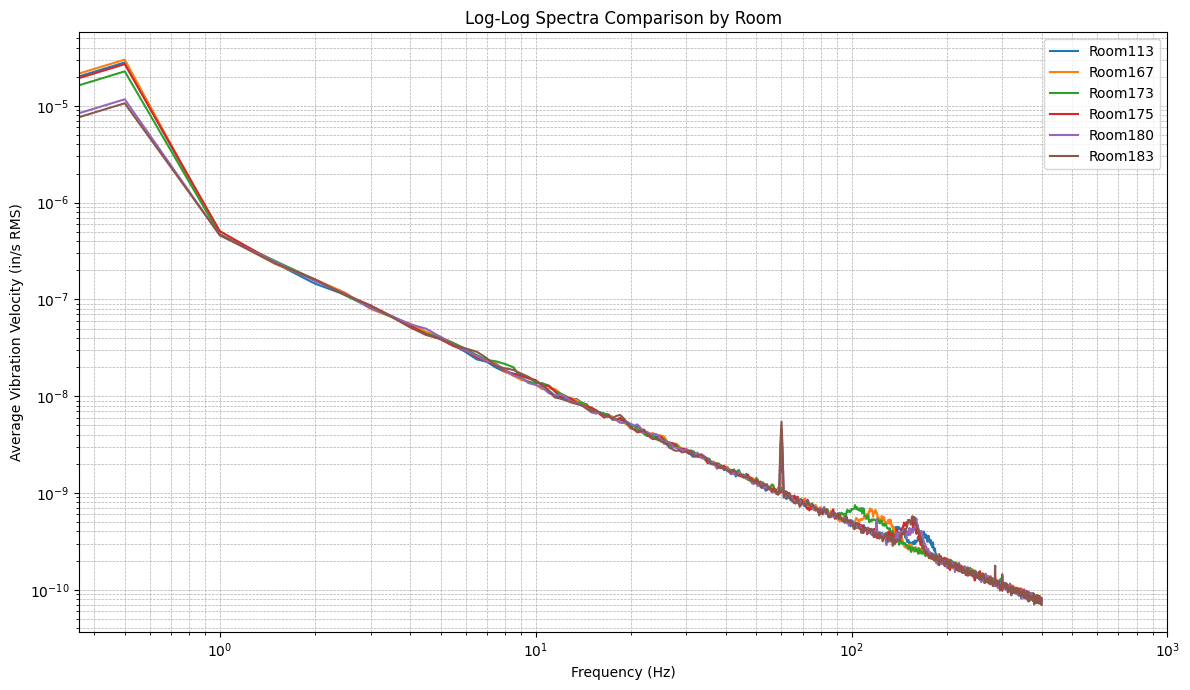

In [32]:
plt.figure(figsize=(12, 7))
for room, (freq, avg_vib) in room_avg_spectra.items():
    plt.plot(freq, avg_vib, label=room)

plt.xscale("log")
plt.yscale("log")

xticks = [10**i for i in range(0, 4)]
plt.xticks(xticks, labels=[f"$10^{i}$" for i in range(0, 4)])

plt.xlabel("Frequency (Hz)")
plt.ylabel("Average Vibration Velocity (in/s RMS)")
plt.title("Log-Log Spectra Comparison by Room")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()